#### Essayer d'apprendre les paramètres du ressort à partir des descripteurs des signaux pour avoir des coefs d'importance pour les descripteurs (poids à mettre pour le calcul des distance)

**Méthode utilisée:** regression linéaire sur un paramètre

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 

import simu_ressort
import descriptor

In [3]:
names_desc = ['mean', 'std', 'fr_max', 'ampl_max', 'spectral centroid',
              'spectral width', 'spectral platitude', 'spectral asymetry']

In [6]:
dir_to_load = "data/lung_C_long"

In [11]:
files_to_load = os.listdir(dir_to_load)
all_simus = []

for file in files_to_load:
    data_df = pd.read_csv(dir_to_load + '/' + file)
    data_df = data_df[[col for col in data_df.columns if col[0] == 'V']]
    
    data_np = np.array(data_df).T
    
    # Cut data
    data_np = data_np[:, 50:]
    
    all_simus.append({
        'C': float(file[8:-4]),
        'simu': data_np
    })
    
print("Parameters C:")
print([x['C'] for x in all_simus])

Parameters C:
[0.0015, 0.001, 0.0025, 0.002, 0.0035, 0.003, 0.0045, 0.004, 0.0055, 0.006]


In [12]:
all_simus[0]['simu'].shape

(100, 150)

-> 100 simus de taille 50

In [13]:
print("{} parameters tested, and {} simus for each parameter.".format(len(all_simus),
                                                                      all_simus[0]['simu'].shape[0]))
print("The duration of each simu is {} dt.".format(all_simus[0]['simu'].shape[1]))

print("{} descripteurs pour chaque simu".format(len(descriptor.compute_descriptor([1, 2]))))

10 parameters tested, and 100 simus for each parameter.
The duration of each simu is 150 dt.
8 descripteurs pour chaque simu


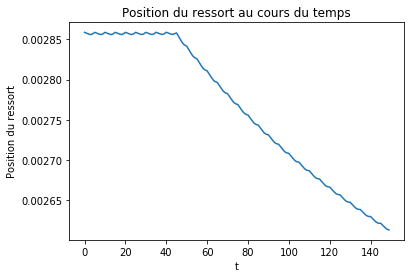

Descripteurs: [  2.76165024e-03   8.58628099e-05   0.00000000e+00   4.14247536e-01
  -1.27634893e-04   6.21469148e-02   3.15487409e+01  -1.26777188e-01]


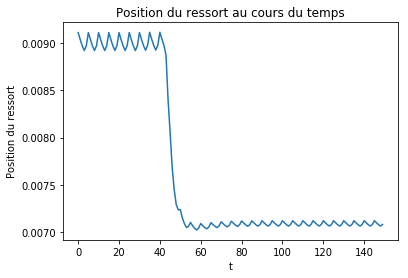

Descripteurs: [  7.67156946e-03   8.69918361e-04   0.00000000e+00   1.15073542e+00
  -2.55017645e-04   9.45230536e-02   1.16936463e+01  -6.73974750e-02]


In [20]:
i = 1
V = all_simus[0]['simu'][1, :]
simu_ressort.plot_ressort(V)
desc = descriptor.compute_descriptor(V)
print("Descripteurs:", desc)

V = all_simus[9]['simu'][0, :]
simu_ressort.plot_ressort(V)
desc = descriptor.compute_descriptor(V)
print("Descripteurs:", desc)

### Preprocess data

In [21]:
nb_desc = len(descriptor.compute_descriptor([0]))
nb_simus = len(all_simus) * len(all_simus[0]['simu'])
print("{} descriptors and {} signals".format(nb_desc, nb_simus))

D:\Cours\Ponts\MVA\ACTERREA\Code\acterrea\descriptor.py:8: RuntimeWarning: invalid value encountered in double_scalars
  sm = np.sum(fft*(freq**i))/np.sum(fft)


8 descriptors and 1000 signals


In [22]:
def preprocess_simu_to_numpy(all_simus, param='F'):

    X_data = []
    Y_data = []

    for i in range(len(all_simus)):
        for j in range(len(all_simus[i]['simu'])):
            X_data.append(descriptor.compute_descriptor(all_simus[i]['simu'][j, :]))
            Y_data.append([all_simus[i][param]])
            
    return np.array(X_data), np.array(Y_data)

In [23]:
def separate_test_train(X_data, Y_data, pct_train=0.8):
    n_train = int(pct_train * len(X_data))
    
    X_train = X_data[:n_train, :]
    X_test = X_data[n_train:, :]    
    Y_train = Y_data[:n_train, :]    
    Y_test = Y_data[n_train:, :]
    
    return X_train, X_test, Y_train, Y_test

In [24]:
X_data, Y_data = preprocess_simu_to_numpy(all_simus, param='C')

Y_data *= 100  # Sinon valuers de C trop faibles et coefs nuls

# Mettre les variables à la même échelle
X_data = StandardScaler().fit_transform(X_data)

print("Shape of X_data: {} and Y_data: {}".format(np.shape(X_data), np.shape(Y_data)))

X_train, X_test, Y_train, Y_test = separate_test_train(X_data, Y_data, pct_train=0.8)

Shape of X_data: (1000, 8) and Y_data: (1000, 1)


In [25]:
Y_data

array([[ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [ 0.15],
       [

In [26]:
# Transformer en DataFrame juste pour faire plus beau pour les coef de corr

X_df = pd.DataFrame(X_data)
X_df.columns = names_desc

# Ajouter les variables F et k
X_df['C'] = Y_data[:, 0]

X_df.describe()

,mean,std,fr_max,ampl_max,spectral centroid,spectral width,spectral platitude,spectral asymetry,C
count,1.000000e+03,1.000000e+03,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.906564e-16,-2.027822e-16,0.0,-1.103118e-15,2.320366e-16,-8.183454e-16,1.118661e-15,2.653433e-17,0.335000
std,1.000500e+00,1.000500e+00,0.0,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.158272
min,-1.731361e+00,-4.620125e-01,0.0,-1.731361e+00,-6.283002e+00,-9.183981e-01,-8.022748e-01,-7.142528e+00,0.100000
25%,-8.587811e-01,-4.355113e-01,0.0,-8.587811e-01,2.772912e-01,-6.876306e-01,-6.842720e-01,-4.954694e-01,0.200000
50%,6.121922e-02,-3.037169e-01,0.0,6.121922e-02,2.851433e-01,-2.719887e-01,-4.521252e-01,4.773540e-01,0.325000
75%,7.953062e-01,1.196427e-01,0.0,7.953062e-01,2.885004e-01,3.608244e-01,3.540992e-01,6.566089e-01,0.450000
max,1.605799e+00,1.086974e+01,0.0,1.605799e+00,2.891972e-01,4.653059e+00,3.029384e+00,7.860504e-01,0.600000


## 1. Coefficients de corrélation

In [27]:
X_df.corr()

,mean,std,fr_max,ampl_max,spectral centroid,spectral width,spectral platitude,spectral asymetry,C
mean,1.000000,0.299365,NaN,1.000000,0.056820,0.384751,-0.793032,0.709356,0.987075
std,0.299365,1.000000,NaN,0.299365,-0.805877,0.820187,-0.325494,-0.055275,0.370284
fr_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ampl_max,1.000000,0.299365,NaN,1.000000,0.056820,0.384751,-0.793032,0.709356,0.987075
spectral centroid,0.056820,-0.805877,NaN,0.056820,1.000000,-0.874478,0.226973,0.289606,0.003731
spectral width,0.384751,0.820187,NaN,0.384751,-0.874478,1.000000,-0.554944,-0.018763,0.434137
spectral platitude,-0.793032,-0.325494,NaN,-0.793032,0.226973,-0.554944,1.000000,-0.671641,-0.748819
spectral asymetry,0.709356,-0.055275,NaN,0.709356,0.289606,-0.018763,-0.671641,1.000000,0.653507
C,0.987075,0.370284,NaN,0.987075,0.003731,0.434137,-0.748819,0.653507,1.000000


In [28]:
X_df.corr()['C']

mean                  0.987075
std                   0.370284
fr_max                     NaN
ampl_max              0.987075
spectral centroid     0.003731
spectral width        0.434137
spectral platitude   -0.748819
spectral asymetry     0.653507
C                     1.000000
Name: C, dtype: float64

`F` et `k` fortement corrélés à `spectrak width`mais également à `spectral platitude` et `spectral centroid`

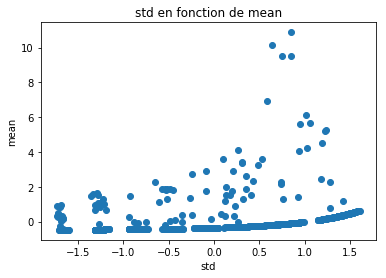

In [29]:
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.title('std en fonction de mean')
plt.xlabel('std')
plt.ylabel('mean')
plt.show()

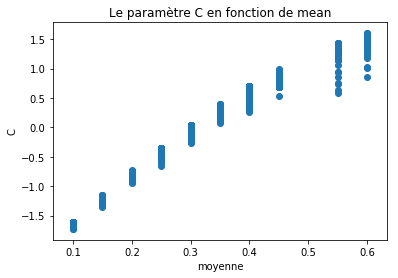

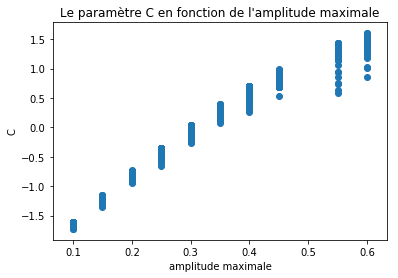

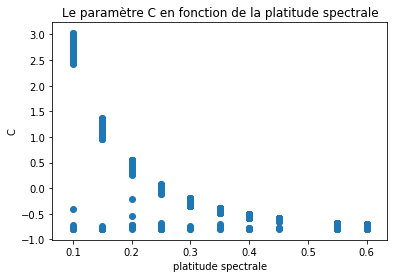

In [32]:
plt.scatter(Y_data[:, 0], X_data[:, 0])
plt.title('Le paramètre C en fonction de mean')
plt.xlabel('moyenne')
plt.ylabel('C')
plt.show()

plt.scatter(Y_data[:, 0], X_data[:, 3])
plt.title("Le paramètre C en fonction de l'amplitude maximale")
plt.xlabel('amplitude maximale')
plt.ylabel('C')
plt.show()

plt.scatter(Y_data[:, 0], X_data[:, 6])
plt.title("Le paramètre C en fonction de la platitude spectrale")
plt.xlabel('platitude spectrale')
plt.ylabel('C')
plt.show()

## 2. Apprendre `C` avec une regression linéaire
Pour trouver les poids des descripteurs

In [33]:
def train_regr_lin(X_train, Y_train, X_test, Y_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)

    y_pred = regr.predict(X_test)
    print("MSE on test set:", mean_squared_error(y_pred, Y_test))
    
    return regr

In [34]:
_ = train_regr_lin(X_train, Y_train, X_test, Y_test)

MSE on test set: 0.00303477845554


-> L'erreur est assez variable selon le jeu de données et j'ai du mal à voir pourquoi

#### Prédiction de `C`

In [35]:
regr_f = train_regr_lin(X_train, Y_train[:, 0], X_test, Y_test[:, 0])

MSE on test set: 0.00303477845554


In [36]:
regr_f.coef_

array([ 0.07027885,  0.00320441,  0.        ,  0.07027885,  0.0129017 ,
        0.01899026,  0.01017866,  0.00174906])

In [38]:
def normalize_coef(coefs, seuil=0.005):
    coefs_treated = [abs(x) for x in coefs]
    coefs_treated = [x if x > seuil else 0 for x in coefs_treated]
    
    # Somme = 1
    print(np.sum(coefs_treated))
    coefs_treated /= np.sum(coefs_treated)

    # Mettre dans un dico pour faire joli
    coefs_dico = {}
    for i in range(len(coefs_treated)):
        coefs_dico[names_desc[i]] = coefs_treated[i]
    
    return coefs_dico, coefs_treated
    
coefs_dico, coefs_treated = normalize_coef(regr_f.coef_)
print(coefs_treated)
coefs_dico

0.182628324931
[ 0.38481898  0.          0.          0.38481898  0.07064459  0.10398312
  0.05573432  0.        ]


{'ampl_max': 0.3848189832042348,
 'fr_max': 0.0,
 'mean': 0.38481898320423508,
 'spectral asymetry': 0.0,
 'spectral centroid': 0.070644594206705422,
 'spectral platitude': 0.055734316699603971,
 'spectral width': 0.10398312268522074,
 'std': 0.0}

In [39]:
regr_f.intercept_  # Zero à l'origine

0.32479656643086691

## 3. ACP

In [40]:
from sklearn.decomposition import PCA

In [41]:
from sklearn import preprocessing

# Normalize data

scaler = preprocessing.StandardScaler().fit(X_data)
X_scaled = preprocessing.scale(X_data)

#### Projection en 2D

In [42]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_comp, columns=['principal component 1', 'principal component 2'])
principal_df['target'] = Y_data[:, 0]

In [43]:
x = pca.explained_variance_ratio_
print(x)
print("La premiere composante principale explique {}% de la variance des données".format(round(x[0] * 100, 2)))

[ 0.54029245  0.35418078]
La premiere composante principale explique 54.03% de la variance des données


In [44]:
pca.components_

array([[  4.57036111e-01,   3.10279807e-01,  -0.00000000e+00,
          4.57036111e-01,  -1.91773820e-01,   3.68247075e-01,
         -4.62264659e-01,   3.16054910e-01],
       [ -2.42670501e-01,   4.39856562e-01,  -1.11022302e-16,
         -2.42670501e-01,  -5.72586224e-01,   4.21804819e-01,
          1.05524203e-01,  -4.14534213e-01]])

-> Coordonnées des premières et deuxiemes composantes principales dans l'espace des descripteurs

ACP pour faire de la réduction de dimension: projetter sur un certains nb de composantes principales (nb < au nb de coord)

**Problème de l'ACP:** la moyenne, variance, etc... sont les variables qui permettent le mieux d'"étaler" les points alors qu'elles ne sont pas pertinentes ici, car le but est de classifier en fonction de F et k

-> Utile en non supervisé lorque l'on a vraiment aucune idée de ce que l'on cherche